In [1]:
#STOCK PRICE PREDICTION USING ARIMA MODEL
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot
data=pd.read_csv('EW-MAX.csv')
#Data in a time period between 2000-2017
data

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600
...,...,...,...,...,...,...,...
4387,2017/9/1,113.790001,114.099998,112.790001,113.309998,113.309998,950000
4388,2017/9/5,112.519997,113.529999,111.160004,111.870003,111.870003,1805200
4389,2017/9/6,112.029999,112.489998,110.250000,112.230003,112.230003,2136700
4390,2017/9/7,112.459999,112.900002,112.000000,112.339996,112.339996,1251600


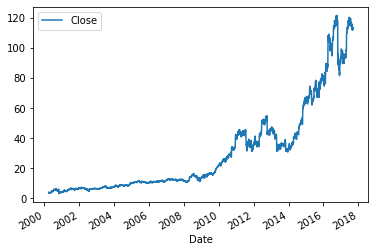

In [2]:
data_c=pd.DataFrame(data['Close'])
from datetime import datetime
data_c['Date']=pd.to_datetime(data['Date'],infer_datetime_format=True)
index_data=data_c.set_index(['Date'])
index_data.head()
index_data.plot()

In [3]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller test:')
dftest=adfuller(index_data['Close'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)    

Results of Dickey-Fuller test:
Test statistic                    0.946224
p-value                           0.993665
#Lags used                        5.000000
Number of observations used    4386.000000
Critical Value (1%)              -3.431842
Critical Value (5%)              -2.862199
Critical Value (10%)             -2.567121
dtype: float64


Results of Dickey-Fuller test:
Test statistic                  -29.089857
p-value                           0.000000
#Lags used                        4.000000
Number of observations used    4386.000000
Critical Value (1%)              -3.431842
Critical Value (5%)              -2.862199
Critical Value (10%)             -2.567121
dtype: float64


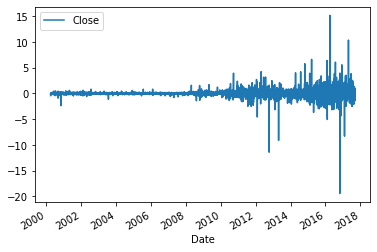

In [6]:
data_s=index_data.diff().dropna()
data_s.plot()
#Checking p value again
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller test:')
dftest=adfuller(data_s['Close'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)    

               Close
Date                
2015-12-10  0.780007
2015-12-11 -1.930001
2015-12-14  0.674996
2015-12-15 -0.500000
2015-12-16  1.540001
...              ...
2017-09-01 -0.350006
2017-09-05 -1.439995
2017-09-06  0.360000
2017-09-07  0.109993
2017-09-08  0.850006

[440 rows x 1 columns]


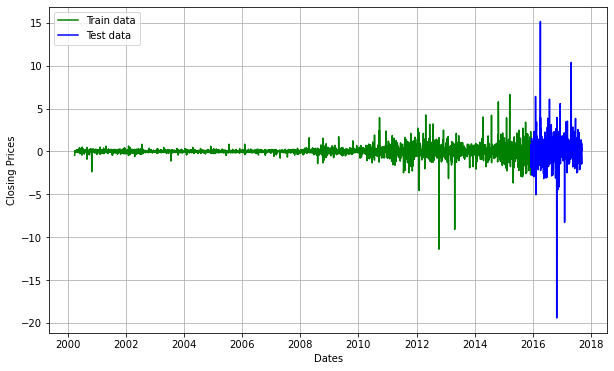

In [7]:
import matplotlib.pyplot as plt
train_data,test_data=data_s[3:int(len(data_s)*0.9)],data_s[int(len(data_s)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data,'green',label="Train data")
plt.plot(test_data,'blue',label="Test data")
plt.legend()
print(test_data)

In [8]:
#to determine the order
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())






Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6787.325, Time=0.55 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6789.090, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6789.104, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=6785.101, Time=0.96 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=6786.514, Time=1.38 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=6786.031, Time=0.75 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=6786.334, Time=0.26 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=6786.545, Time=0.20 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=2.83 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6782.405, Time=2.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=6786.411, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6786.392, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6784.074, Time=1.83 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=6783.621, Time=1.91 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : 

In [9]:
model = ARIMA(train_data, order=(1, 0, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 3948
Model:                     ARMA(1, 0)   Log Likelihood               -3390.196
Method:                       css-mle   S.D. of innovations              0.571
Date:                Thu, 26 Nov 2020   AIC                           6786.392
Time:                        19:54:12   BIC                           6805.235
Sample:                             0   HQIC                          6793.076
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0195      0.009      2.169      0.030       0.002       0.037
ar.L1.Close    -0.0089      0.016     -0.559      0.576      -0.040       0.022
                                    Roots       

/home/dinesh/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


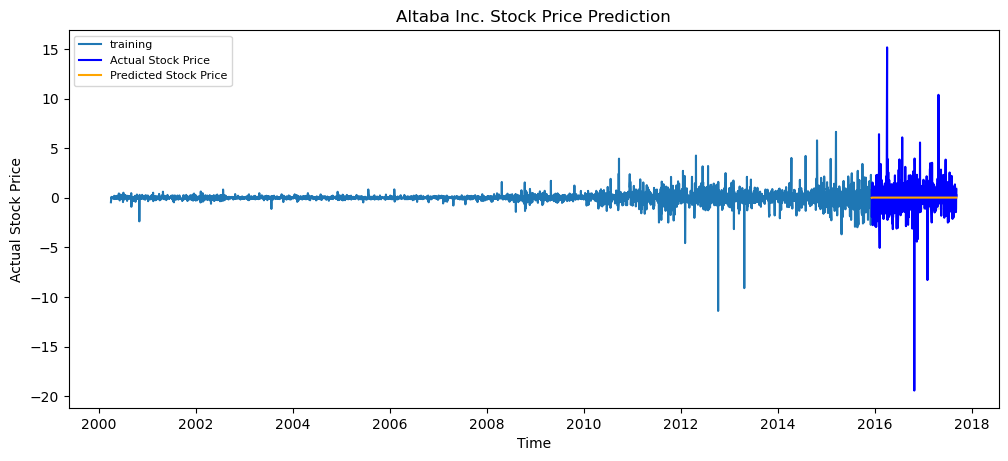

In [10]:
# Forecast
fc, se, conf = fitted.forecast(440, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Altaba Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [11]:
from sklearn import metrics
#MAE(Average error)
print(metrics.mean_absolute_error(test_data,fc_series))

1.1710479881726241
